### Data init and split 

In [414]:
import torch 
from torch import nn 
import matplotlib.pyplot as plt

import numpy as np

weight =0.7
bias = 0.3

start = 0
end =1 
step =0.02
X= torch.arange(start, end, step).unsqueeze(dim=1)

y = weight*X +bias


#Split the data
train_split = int(0.8*len(X))
X_train, y_train = X[:train_split], y[:train_split]
X_test, y_test = X[train_split:], y[train_split:]




### Data plot 

In [415]:
def plot_predictions(train_data=X_train, 
                     train_labels=y_train,
                     test_data = X_test,
                     test_labels=y_test,
                     predictions=None
                     ):
    
    plt.figure(figsize=(10,7))

    plt.scatter(train_data, train_labels, c='b', s=4, label="Training data")
    plt.scatter(test_data, test_labels, c='g', s=4, label="Test data")

    if predictions is not None:

        plt.scatter(test_data, predictions, c='r', s=4, label="Predictions")

    plt.legend(prop={"size":14})

    plt.savefig("f1")

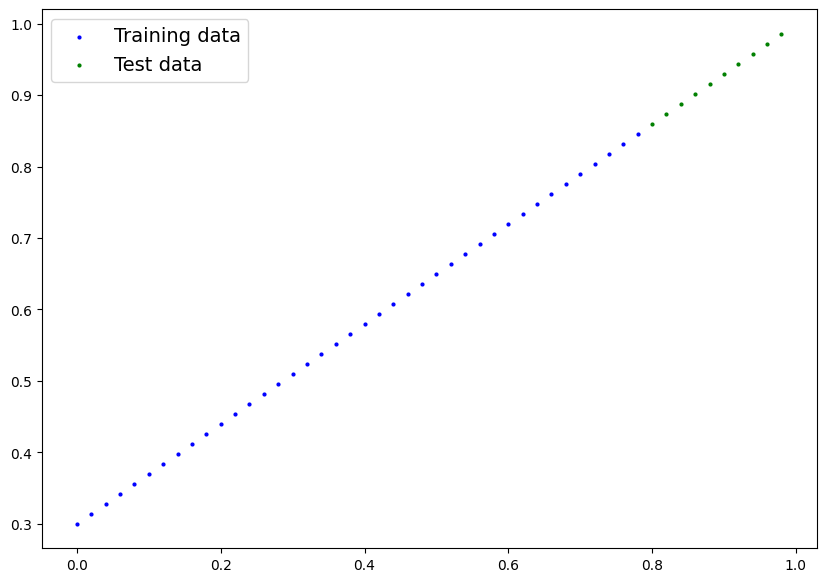

In [416]:
plot_predictions()

### Model build 

Linear regression model 

Main learning algorithms: 
1. Gradient descent
2. Backpropagation


In [417]:
class LinearRegressionModel (nn.Module): # pytorch Module is inherited almost everywhere (models should subclass this class)

    def __init__(self):
        super().__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float)) #tensors assigned as module's attributes

        self.bias = nn.Parameter(torch.randn(1, requires_grad=True, dtype=torch.float))

    def forward(self, x: torch.Tensor) ->torch.Tensor: #forward defines a computation performed at every call 

        return self.weights*x+self.bias #linear regression formula



### PyTorch model building essentials: 

* torch.nn - contains all of the building for a computational graph 
* torch.nn.Parameter
* torch.nn.Module - base class for al neural network modules, forawrd method should be overwritten
* torch.optim - optimizers

### Checking the contents of the model above 



In [418]:
#Random seed 

torch.manual_seed(42)

#Create the isntance of a module 
model_0=LinearRegressionModel()

#Parameters 
list(model_0.parameters())

model_0.state_dict()


OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

### Making predicitons 

Predictions using torch.inference_mode() - data will be passed through forward method 

In [419]:
with torch.inference_mode(): #inference mode disables things used for training - less data
    y_pred = model_0(X_test)

y_pred

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

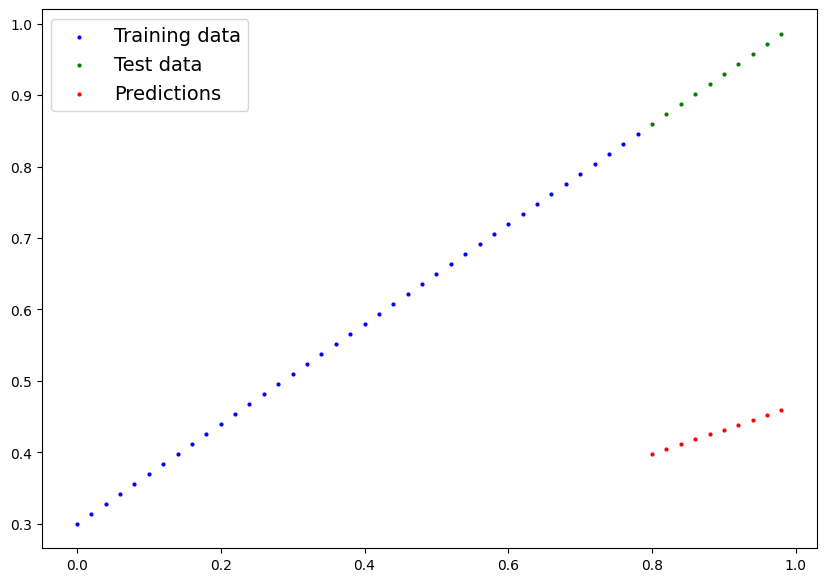

In [420]:
plot_predictions(predictions=y_pred)

### Training the model 
* Loss function 
* Optimizer

For PyTorch:
*Training loop
*Testing loop 



In [421]:
loss_fn=nn.L1Loss() #loss function setup

optimizer = torch.optim.SGD(params= model_0.parameters(), lr=0.01) #stochastic gradient descent 
                                                            
                                                            #params - model parameters
                                                            #lr = learning rate - the higher the more aggresive


### Building a training loop

0. Loop through the data 
1. Forward pass (data moving through model's forward functions) - forward propagation 
2. Calculate the loss 
3. Optimizer zero grad
4. Loss backward - move backawrds through the network to calculate the gradients of each of the parameters of our model with respect to the loss (**backpropagation**)
5. Optimizer step - improving the loss (**gradient descent**)


In [422]:
torch.manual_seed(42)
epochs = 200

epoch_count=[]
loss_values=[]
test_loss_values=[]

#0. loop through the data

for epoch in range(epochs):
    #Set  the model to training mode 

    model_0.train() #sets all parameters back to require gradients (contrary to inference mode)

    #1. Forawrd pass 
    y_pred = model_0(X_train)

    #2. Calculate the loss 

    loss = loss_fn(y_pred, y_train)

    #3. Optimizer zero grad
    optimizer.zero_grad() #fresh start of the optimizer (kinda)

    #4. Backpropagation 
    loss.backward()
    #print(f"Loss:{loss}")

    #5. Step the optimizer 
    optimizer.step() # by default how the optimizer changes will accumulate 


    model_0.eval() #turns off gradient tracking 

    ### Testing
    model_0.eval() #turnbs off unnecessary settings for beter performance 

    with torch.inference_mode():

        #1. Forward pass 

        test_pred = model_0(X_test)

        #2. Loss calculation

        test_loss = loss_fn(test_pred, y_test)
    if epoch % 10 ==0:

        epoch_count.append(epoch)
        loss_values.append(loss)
        test_loss_values.append(test_loss)
        
        print(f"Epoch:{epoch} | Test loss {test_loss} | Loss: {loss} | ")
        print(model_0.state_dict())



Epoch:0 | Test loss 0.48106518387794495 | Loss: 0.31288138031959534 | 
OrderedDict({'weights': tensor([0.3406]), 'bias': tensor([0.1388])})
Epoch:10 | Test loss 0.3463551998138428 | Loss: 0.1976713240146637 | 
OrderedDict({'weights': tensor([0.3796]), 'bias': tensor([0.2388])})
Epoch:20 | Test loss 0.21729660034179688 | Loss: 0.08908725529909134 | 
OrderedDict({'weights': tensor([0.4184]), 'bias': tensor([0.3333])})
Epoch:30 | Test loss 0.14464017748832703 | Loss: 0.053148526698350906 | 
OrderedDict({'weights': tensor([0.4512]), 'bias': tensor([0.3768])})
Epoch:40 | Test loss 0.11360953003168106 | Loss: 0.04543796554207802 | 
OrderedDict({'weights': tensor([0.4748]), 'bias': tensor([0.3868])})
Epoch:50 | Test loss 0.09919948130846024 | Loss: 0.04167863354086876 | 
OrderedDict({'weights': tensor([0.4938]), 'bias': tensor([0.3843])})
Epoch:60 | Test loss 0.08886633068323135 | Loss: 0.03818932920694351 | 
OrderedDict({'weights': tensor([0.5116]), 'bias': tensor([0.3788])})
Epoch:70 | Test

Text(0.5, 1.0, 'Trainign and test loss curve ')

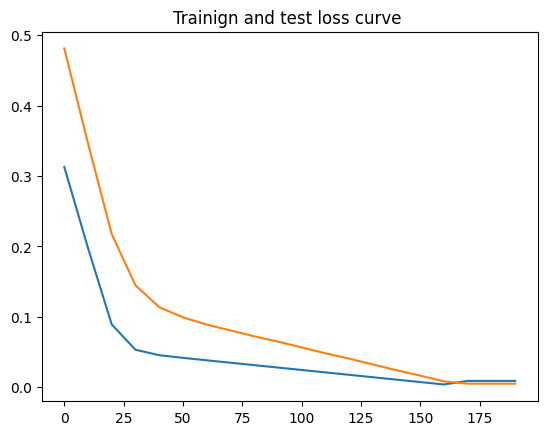

In [423]:
plt.plot(epoch_count, np.array(torch.tensor(loss_values).cpu().numpy()), label="train values")
plt.plot(epoch_count, np.array(torch.tensor(test_loss_values).cpu().numpy()), label="test values")
plt.title("Trainign and test loss curve ")

In [424]:
with torch.inference_mode():
    y_preds_new=model_0(X_test)
    

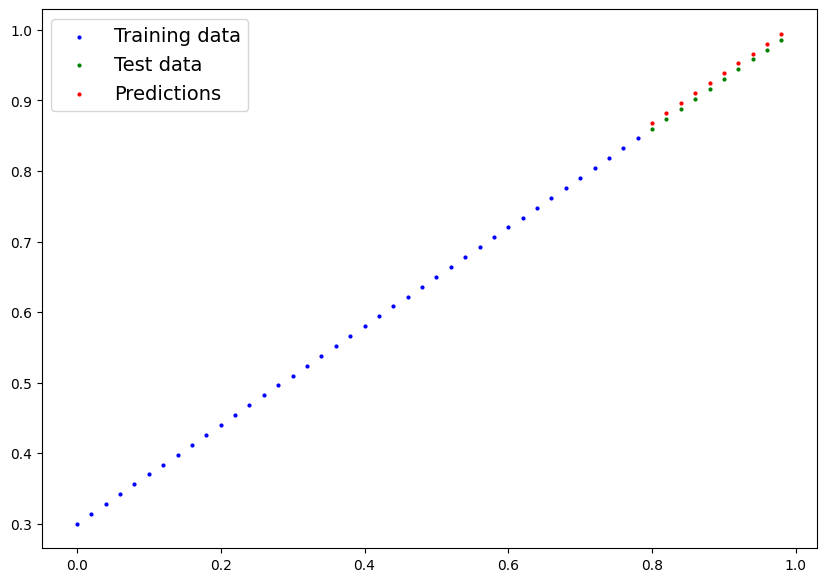

In [425]:
plot_predictions(predictions=y_preds_new)

### Saving a model 

Three methods: 
1. `torch.save`  PyTorch object in a pickle format state_dict or entire model
2. `torch.load` 
3. `torch.nn.Module.load_state_dict` loading a model's saved dicitonary - python dictionary object that maps each layer to its parameter tensor 

In [426]:
#Save the model 

from pathlib import Path

#1. Create model directory 
MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)
#@. Create mdoel save path 

MODEL_NAME = '01_pytorch_workflow_model_0.pth'
MODEL_SAVE_PATH  = MODEL_PATH / MODEL_NAME

# 3. Save the model state dict 

torch.save(model_0.state_dict(), MODEL_SAVE_PATH )

### Loading the model 

Since we saved the model in state_dict, we'll create a new instance of our model class and load the state_dict there 


In [427]:
loaded_model_0 = LinearRegressionModel()

loaded_model_0.load_state_dict(torch.load(f=MODEL_SAVE_PATH))

<All keys matched successfully>

In [428]:
loaded_model_0.state_dict()

OrderedDict([('weights', tensor([0.6990])), ('bias', tensor([0.3093]))])

### Putting it all together 


In [429]:
import torch 
import matplotlib.pyplot as plt 

import numpy as np 

from torch import nn



Device agnostic code 

In [430]:
device = "cuda" if torch.cuda.is_available() else "cpu"




In [431]:
# Create the data 
weight = 0.7
bias = 0.3

start = 0
step = 0.02
stop = 1

X=torch.arange(start,stop,step).unsqueeze(dim=1)
Y= weight*X + bias 

X[:10], Y[:10]

#

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260]]))

In [432]:
#Split the data 

X_train = X[:int(0.8*len(X))]
Y_train = Y[:int(0.8*len(X))]


X_test = X[int(0.8*len(X)):]
Y_test = Y[int(0.8*len(X)):]

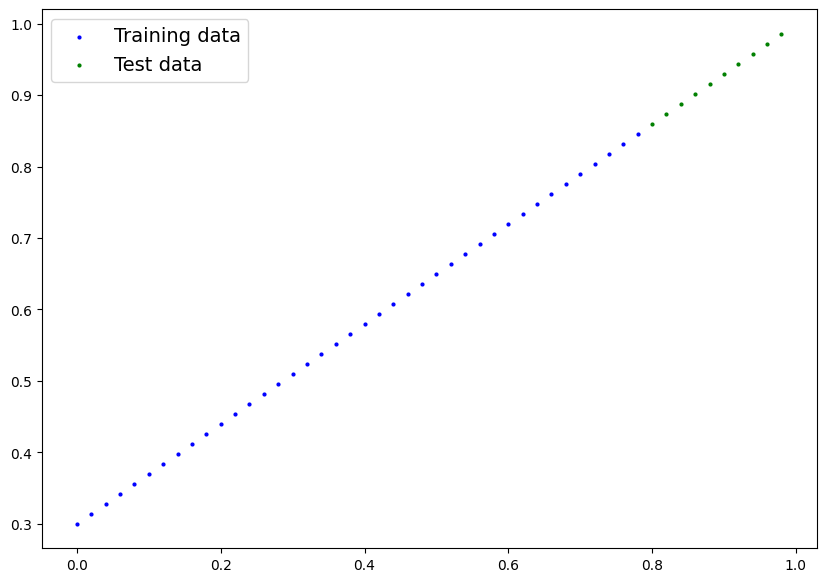

In [433]:
#Plot the data
plot_predictions(X_train, Y_train, X_test, Y_test)

### Building the model 

In [434]:
class LR_2(nn.Module):

    def __init__(self):

        super().__init__()

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor)->torch.tensor:
        
        return self.linear_layer(x)
    

torch.manual_seed(42)
model_1 = LR_2()
model_1, model_1.state_dict()

(LR_2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [435]:
# Set the model to use the target device 

model_1.to(device)

next(model_1.parameters()).device

device(type='cuda', index=0)

### Training 

* Loss function 
* Optimizer
* training loop 
 *Test loop

In [436]:
loss_fn=nn.L1Loss()

optimizer = torch.optim.SGD(params=model_1.parameters(), lr=0.01)

torch.manual_seed(42)

epochs = 200 

#Puth data on the target device 

X_train = X_train.to(device)
y_train = y_train.to(device)

X_test = X_test.to(device)
y_test = y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    #1. Forward pass 
    y_pred = model_1(X_train)

    #2. Loss
    loss = loss_fn(y_pred, y_train)

    #3 Optimizer zero grad 
    optimizer.zero_grad()

    #4. Backpropagation 
    loss.backward()

    #5. optimzier step 
    optimizer.step()
    
    ### Testing 
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(X_test)

        test_loss = loss_fn(test_pred, y_test)

    if epoch % 10 == 0:
        print(f"Epoch: {epoch} | Loss {loss} | Test_loss {test_loss}")





Epoch: 0 | Loss 0.5551779866218567 | Test_loss 0.5739762187004089
Epoch: 10 | Loss 0.439968079328537 | Test_loss 0.4392664134502411
Epoch: 20 | Loss 0.3247582018375397 | Test_loss 0.30455657839775085
Epoch: 30 | Loss 0.20954833924770355 | Test_loss 0.16984669864177704
Epoch: 40 | Loss 0.09433845430612564 | Test_loss 0.03513690456748009
Epoch: 50 | Loss 0.023886388167738914 | Test_loss 0.04784907028079033
Epoch: 60 | Loss 0.019956795498728752 | Test_loss 0.045803118497133255
Epoch: 70 | Loss 0.016517987474799156 | Test_loss 0.037530567497015
Epoch: 80 | Loss 0.013089174404740334 | Test_loss 0.02994490973651409
Epoch: 90 | Loss 0.009653178043663502 | Test_loss 0.02167237363755703
Epoch: 100 | Loss 0.006215683650225401 | Test_loss 0.014086711220443249
Epoch: 110 | Loss 0.00278724217787385 | Test_loss 0.005814164876937866
Epoch: 120 | Loss 0.0012645035749301314 | Test_loss 0.013801801018416882
Epoch: 130 | Loss 0.0012645035749301314 | Test_loss 0.013801801018416882
Epoch: 140 | Loss 0.0012

In [437]:
model_1.state_dict()

OrderedDict([('linear_layer.weight', tensor([[0.6968]], device='cuda:0')),
             ('linear_layer.bias', tensor([0.3025], device='cuda:0'))])

### Making and evaluating predictions 

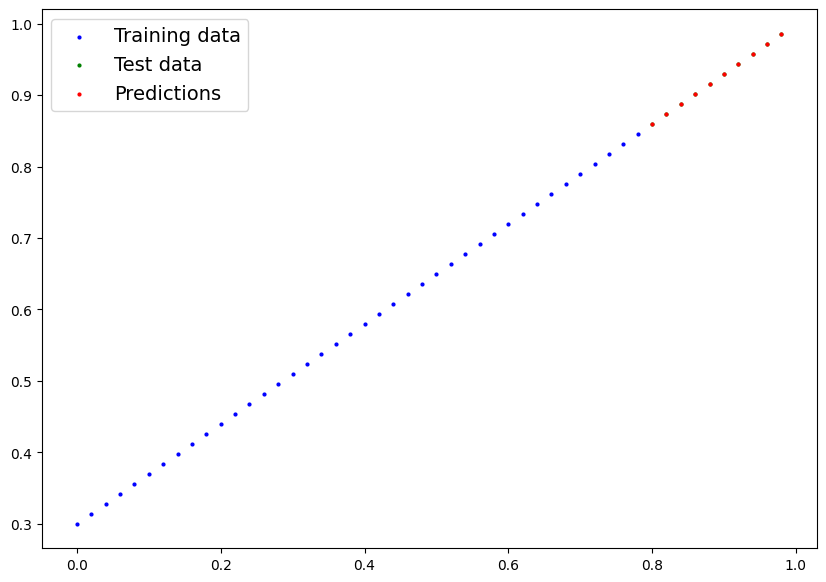

In [438]:
model_1.eval()

with torch.inference_mode():

    y_preds = model_1(X_test)



plot_predictions(predictions = y_preds.cpu())

### Save and load 

In [440]:
from pathlib import Path

MODEL_PATH = Path("models")
MODEL_PATH.mkdir(parents=True, exist_ok = True)

MODEL_NAME = "01_pytorch_workflow_model_1.pth"

MODEL_SAVE_PATH = MODEL_PATH / MODEL_NAME 

torch.save(obj=model_1.state_dict(), f = MODEL_SAVE_PATH)


In [ ]:
loaded_model_1 = LR_2()

loaded_model_1.load_state_dict(torch.load(MODEL_SAVE_PATH))

loaded_model_1.to(device)